In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

import os

In [4]:
df = pd.read_csv('diamonds.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [7]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [9]:
df.drop_duplicates(inplace = True)
df.drop('Unnamed: 0', axis = 1, inplace = True)

#rename columns into a more meaningful names
colnames = {'x': 'length', 
           'y': 'width',
           'z': 'depth',
           'depth': 'total_depth'}
df.rename(columns = colnames, inplace = True)
df

,carat,cut,color,clarity,total_depth,table,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [10]:
df.describe()

,carat,total_depth,table,price,length,width,depth
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


,count
cut,
Ideal,21551
Premium,13791
Very Good,12082
Good,4906
Fair,1610


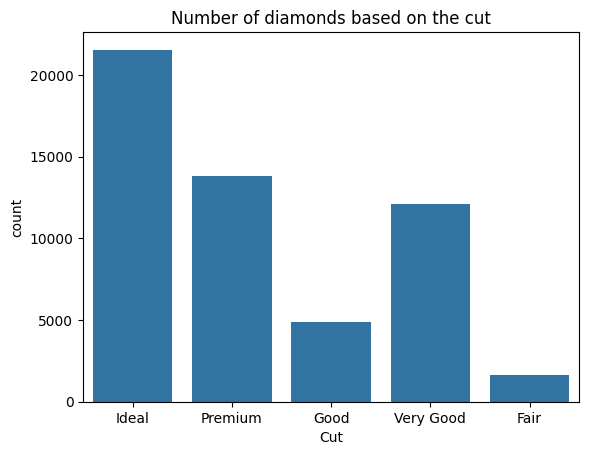

In [11]:
display(pd.DataFrame(df['cut'].value_counts()))

sns.countplot(x = df['cut'])
plt.title('Number of diamonds based on the cut')
plt.xlabel('Cut')
plt.show()

,price
cut,
Fair,4358.757764
Good,3928.864452
Ideal,3457.541970
Premium,4584.257704
Very Good,3981.759891


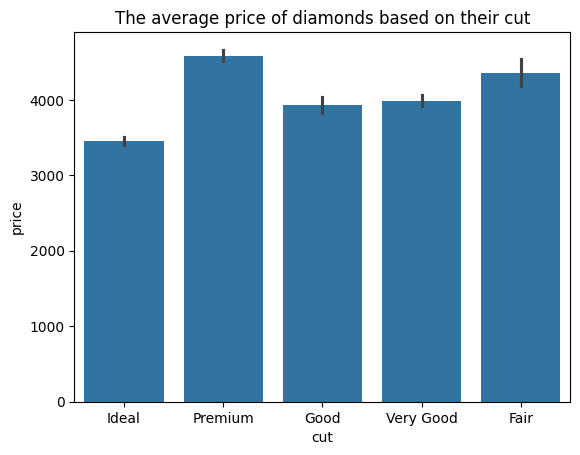

In [12]:
display(pd.DataFrame(df.groupby('cut')['price'].mean()))

# The average price of diamonds based on their cut
sns.barplot(x = df['cut'], y = df['price'])
plt.title('The average price of diamonds based on their cut')
plt.show()

,count
clarity,
SI1,13065
VS2,12258
SI2,9194
VS1,8171
VVS2,5066
VVS1,3655
IF,1790
I1,741


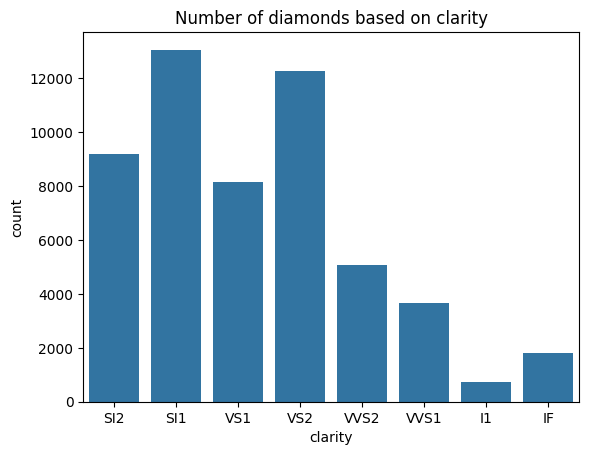

In [13]:
display(pd.DataFrame(df['clarity'].value_counts()))
sns.countplot(x = df['clarity'])
plt.title('Number of diamonds based on clarity')
plt.show()

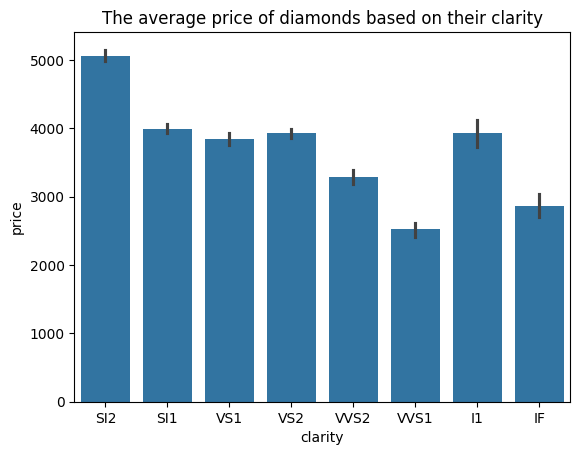

In [14]:
sns.barplot(x = df['clarity'], y = df['price'])
plt.title('The average price of diamonds based on their clarity')
plt.show()

,count
clarity,
SI1,13065
VS2,12258
SI2,9194
VS1,8171
VVS2,5066
VVS1,3655
IF,1790
I1,741


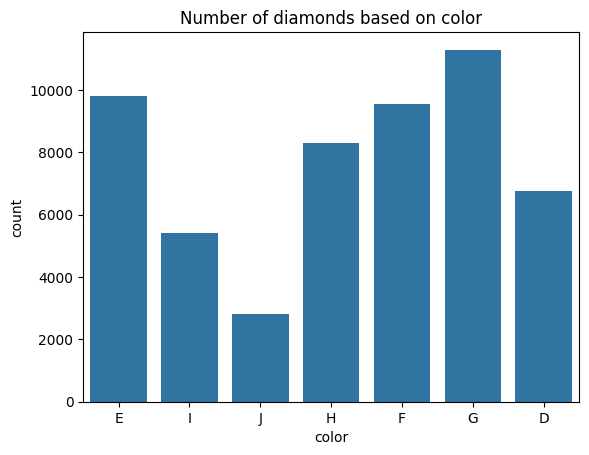

In [15]:
display(pd.DataFrame(df['clarity'].value_counts()))

sns.countplot(x = df['color'])
plt.title('Number of diamonds based on color')
plt.show()

price
color cut             
D     Fair         163
      Good         662
      Ideal       2834
      Premium     1603
      Very Good   1513
E     Fair         224
      Good         933
      Ideal       3903
      Premium     2337
      Very Good   2400
F     Fair         312
      Good         909
      Ideal       3826
      Premium     2331
      Very Good   2164
G     Fair         314
      Good         871
      Ideal       4884
      Premium     2924
      Very Good   2299
H     Fair         303
      Good         702
      Ideal       3115
      Premium     2360
      Very Good   1824
I     Fair         175
      Good         522
      Ideal       2093
      Premium     1428
      Very Good   1204
J     Fair         119
      Good         307
      Ideal        896
      Premium      808
      Very Good    678

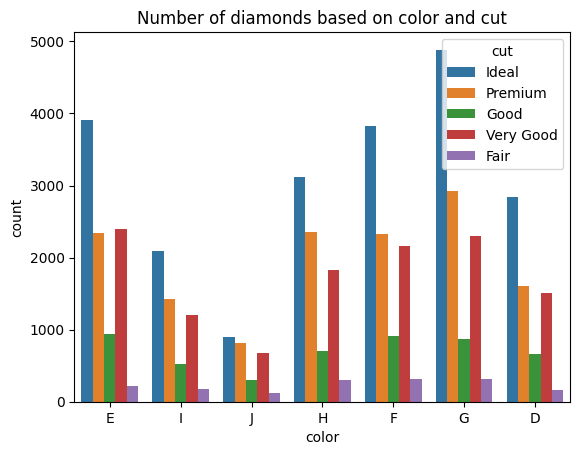

In [16]:
display(pd.DataFrame(df.groupby(['color', 'cut'])['price'].count()))

sns.countplot(x = df['color'], hue = df['cut'])
plt.title('Number of diamonds based on color and cut')
plt.show()

price
color cut                   
D     Fair       4291.061350
      Good       3405.382175
      Ideal      2629.094566
      Premium    3631.292576
      Very Good  3470.467284
E     Fair       3682.312500
      Good       3423.644159
      Ideal      2597.550090
      Premium    3538.914420
      Very Good  3214.652083
F     Fair       3827.003205
      Good       3495.750275
      Ideal      3374.939362
      Premium    4324.890176
      Very Good  3778.820240
G     Fair       4239.254777
      Good       4123.482204
      Ideal      3720.706388
      Premium    4500.742134
      Very Good  3872.753806
H     Fair       5135.683168
      Good       4276.254986
      Ideal      3889.334831
      Premium    5216.706780
      Very Good  4535.390351
I     Fair       4685.445714
      Good       5078.532567
      Ideal      4451.970377
      Premium    5946.180672
      Very Good  5255.879568
J     Fair       4975.655462
      Good       4574.172638
      Ideal      4918.186384
      Premium    6294.591584
      Very Good  5103.513274

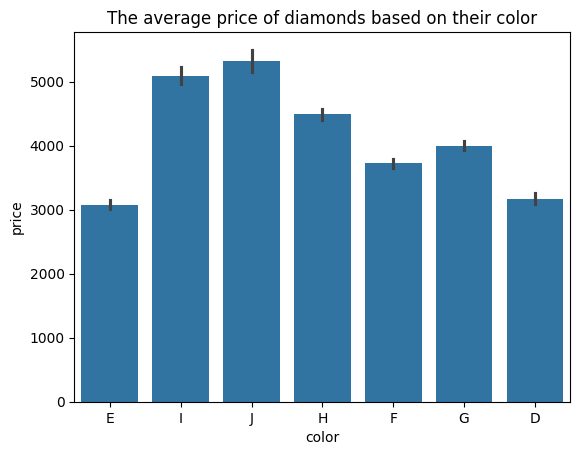

In [17]:
display(pd.DataFrame(df.groupby(['color', 'cut'])['price'].mean()))

sns.barplot(x = df['color'], y = df['price'])
plt.title('The average price of diamonds based on their color')
plt.show()

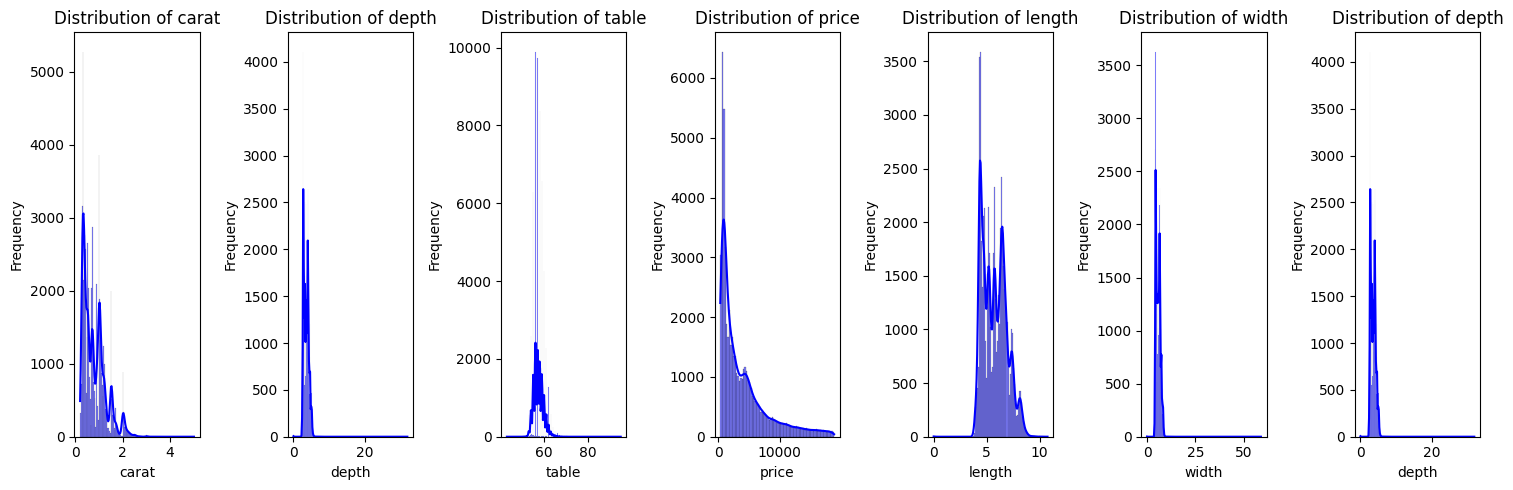

In [18]:
continuous_features = ['carat', 'depth', 'table', 'price', 'length', 'width', 'depth']

fig, axes = plt.subplots(nrows = 1, ncols = len(continuous_features), figsize =(15, 5))

for i, var in enumerate(continuous_features):
    sns.histplot(df[var],color = 'blue', kde = True, ax = axes[i])
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [19]:
df['area'] = df['length'] * df['width']
df

,carat,cut,color,clarity,total_depth,table,price,length,width,depth,area
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,15.7210
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,14.9376
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,16.4835
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,17.7660
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,18.8790
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,33.1200
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,32.7175
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,32.1488
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,37.6380


In [20]:
correlation_matrix = df[['carat', 'total_depth', 'table', 'price', 'length', 'width', 'depth', 'area']].corr()
correlation_matrix

,carat,total_depth,table,price,length,width,depth,area
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,0.981676
total_depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,-0.030916
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,0.187498
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,0.901152
length,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,0.984662
width,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,0.990856
depth,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,0.958460
area,0.981676,-0.030916,0.187498,0.901152,0.984662,0.990856,0.958460,1.000000


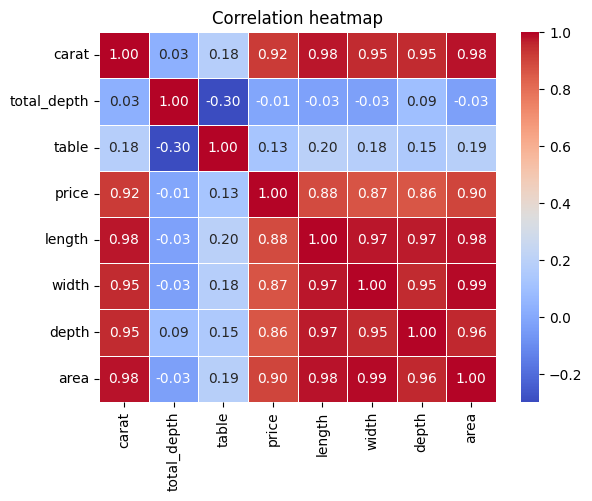

In [21]:
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidth = 0.5)
plt.title('Correlation heatmap')
plt.show()

In [23]:
Y = df['price'].to_numpy(dtype = float)
X = df[['carat','depth', 'color', 'cut', 'clarity', 'area', 'length', 'width']]
X = pd.get_dummies(X).to_numpy(dtype = float)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
lr = LinearRegression()

lr = lr.fit(X_train, Y_train)
print('Trainning accuracy:', r2_score(Y_train, lr.predict(X_train)))

Trainning accuracy: 0.9202914463473367


In [25]:
y_pred = lr.predict(X_test)
print('Coefficient of determination :', r2_score(Y_test, y_pred))
print('Root mean squared error:', np.sqrt(mean_squared_error(Y_test, y_pred)))

Coefficient of determination : 0.9235491063474603
Root mean squared error: 1082.9324081376324
